In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Import the data and check out the dataframe into the pandas library

In [3]:
df_train = pd.read_csv("plant-train.csv")

In [4]:
df_train.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,target/label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df_train[df_train['target/label']=='virginica'].head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,target/label
40,6.3,3.3,6.0,2.5,virginica
41,5.8,2.7,5.1,1.9,virginica
42,7.1,3.0,5.9,2.1,virginica
43,6.3,2.9,5.6,1.8,virginica
44,6.5,3.0,5.8,2.2,virginica


In [6]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal length in cm,80.0,5.82750,0.966656,4.4,5.0,5.7,6.425,7.9
sepal width in cm,80.0,3.20125,0.438205,2.2,2.9,3.2,3.500,4.4
petal length in cm,80.0,3.53875,2.126178,1.0,1.5,3.2,5.600,6.9
petal width in cm,80.0,1.12500,0.894639,0.1,0.2,1.0,2.000,2.5


In [7]:
df_train['target/label'].value_counts()

setosa       40
virginica    40
Name: target/label, dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  80 non-null     float64
 1   sepal width in cm   80 non-null     float64
 2   petal length in cm  80 non-null     float64
 3   petal width in cm   80 non-null     float64
 4   target/label        80 non-null     object 
dtypes: float64(4), object(1)
memory usage: 3.2+ KB


### We are checking the plot of the training data to check whether any given point on the plot is not very far away from the other points (i.e outliers in the dataset)

<Figure size 900x600 with 0 Axes>

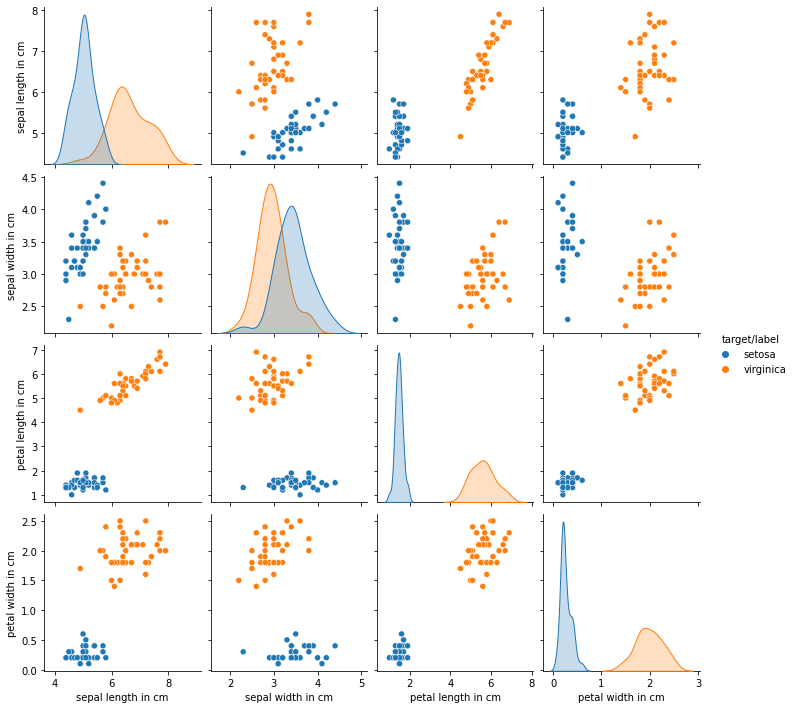

In [9]:
plt.figure(dpi = 150)
sns.pairplot(data = df_train, hue = 'target/label',diag_kind = 'kde')

### Here we check if one feature correlates to other features meantioned in the dataframe and vice versa. Notice that as value gets closer to 1, that feature corresponds more to the other feature it was matched with. 

<AxesSubplot:>

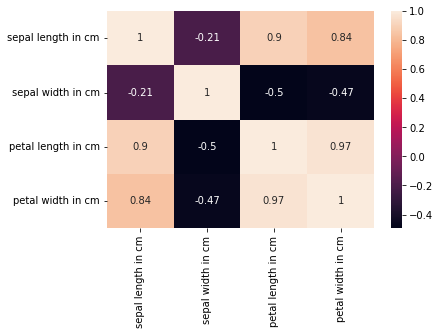

In [10]:
sns.heatmap(df_train.corr(),annot=True)

# Decision Tree Learning

### Splitting the data
The first step we are going to take is to split the data into training and testing data. We can also do improvements on data going ahead from the training data if it's required. We will now perform 75-25% data split of train and test data respectively.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df_train.drop("target/label",axis = 1)
y = df_train["target/label"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42, shuffle = True, stratify = y)

In [14]:
y_test.value_counts()

setosa       10
virginica    10
Name: target/label, dtype: int64

### Importing the LogisticRegression() class and creating a model using normal data values
Here we will import the LogisticRegression() class and will create a model which works on that class. We will then fit the regular data found directly inside the dataframe into the logistic model and train it to behave like a professional working  machine learning model.

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dt_model = DecisionTreeClassifier()

In [17]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

**The coef_ is a special function which returns us the beta coefficient of each feature in the dataset, arranged as the table has arranged its feature columns.**

In [18]:
base_pred = dt_model.predict(X_test)

### Using scoring metrics to verify model's accuracy
For Decision Tree Learning, confusion matrix plots out the true positives, false positives, true negatives and false positives for a given dataset, which helps us understand how the model is predicting correct and incorrect values predicted. We also look at classification report which gives us precision, recall and f1 score which tells us about the model's correctness in predicting values under the previously given data.

In [19]:
from sklearn.metrics import classification_report, plot_confusion_matrix

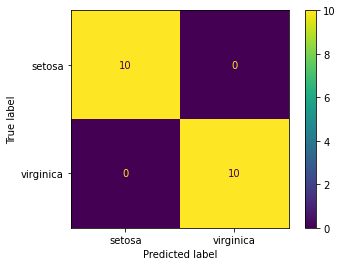

In [20]:
plot_confusion_matrix(dt_model, X_test, y_test)

In [21]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [22]:
pd.DataFrame(index = X.columns, data = dt_model.feature_importances_, columns = ['Feature Importance'])

,Feature Importance
sepal length in cm,0.0
sepal width in cm,0.0
petal length in cm,0.0
petal width in cm,1.0


In [23]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'petal width in cm <= 0.9\ngini = 0.5\nsamples = 60\nvalue = [30, 30]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]')]

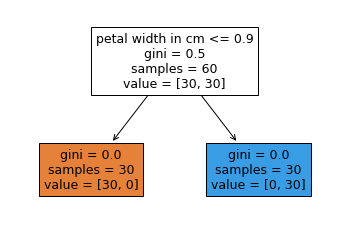

In [24]:
plot_tree(dt_model, feature_names = X.columns, filled = True)

## Using StandardScaler() to normalize data

Normalization should have no impact on the performance of a decision tree. It is generally useful, when you are solving a system of equations, least squares, etc, where you can have serious issues due to rounding errors. In decision tree, you are just comparing stuff and branching down the tree, so normalization would not help. (source: https://math.stackexchange.com/questions/927190/normalization-of-data-in-decision-tree)


For the sake of this experiment,let us use StandardScaler() on the X_train and X_test to prepare our model so that its prediction range comes between 0 and 1 and the metrics' scores are affected (it can generally be good, but sometimes it may work worse)

We will now compute the same metrics and train the model in the same way as we did before, but we will used the scaled values of the data to find out if there is a change in the score that we previously found.

**Note: We use fit_transform() function on X_train as only the features are needed to be fitted and then transformed directly on the scaler model. Fitting is basically computing the mean and standard deviation for subtracting the mean and dividing the standard deviation from each value. The transform() is used on X_test as the fitted scaler model is used for centering and scaling the X_test and is cannot be used for fitting.**

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [28]:
dt_scaled = DecisionTreeClassifier()

In [29]:
dt_scaled.fit(scaled_X_train, y_train)

DecisionTreeClassifier()

In [30]:
scaled_pred = dt_scaled.predict(scaled_X_test)

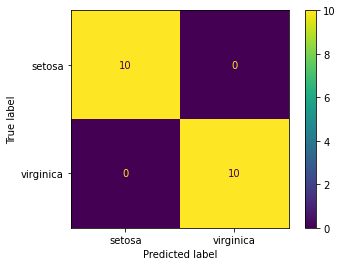

In [31]:
plot_confusion_matrix(dt_scaled, scaled_X_test, y_test)

In [32]:
print(classification_report(y_test,scaled_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [33]:
pd.DataFrame(index = X.columns, data = dt_scaled.feature_importances_, columns = ['Feature Importance'])

,Feature Importance
sepal length in cm,0.0
sepal width in cm,0.0
petal length in cm,1.0
petal width in cm,0.0


[Text(0.5, 0.75, 'petal length in cm <= -0.157\ngini = 0.5\nsamples = 60\nvalue = [30, 30]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]')]

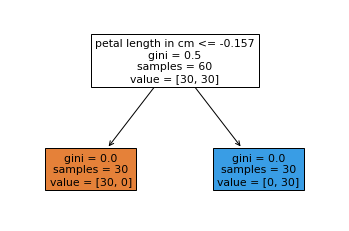

In [34]:
plot_tree(dt_scaled, feature_names = X.columns, filled = True)

# Using the plant-test.csv for validating the trained model
We will now use the plant-test dataset provided to check whether our model was trained properly and at what accuracy does it provide us correct predictions on the unseen data.

In [35]:
df_test = pd.read_csv('plant-test.csv')
X_test_new = df_test.drop('target/label',axis = 1)
y_test_new = df_test['target/label']

In [36]:
df_test['target/label'].value_counts()

setosa       10
virginica    10
Name: target/label, dtype: int64

### Using the normal logistic_model first.

In [37]:
y_pred_new = dt_model.predict(X_test_new)

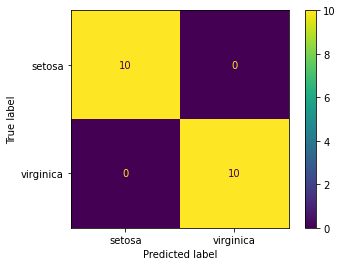

In [38]:
plot_confusion_matrix(dt_model, X_test_new, y_test_new)

In [39]:
print(classification_report(y_test_new,y_pred_new))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



### Using the StandardScaler() to scale and test new test data.

In [40]:
scaled_X_test_new = scaler.transform(X_test_new)

In [41]:
y_pred_new2 = dt_scaled.predict(scaled_X_test_new)

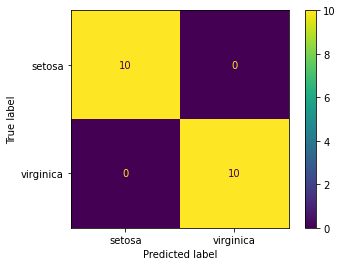

In [42]:
plot_confusion_matrix(dt_scaled, scaled_X_test_new, y_test_new)

In [43]:
print(classification_report(y_test_new,y_pred_new2))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

